In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pickle

In [ ]:
#@title fetch dataset
X_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/X_train_selected.csv")
X_val = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/X_valid_selected.csv")
X_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/X_test_selected.csv")
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/combinedcsv.csv")
y = df["malicious"]

In [ ]:
y_train, y_temp = train_test_split(y, test_size=0.3, random_state=42)
y_val, y_test = train_test_split(y_temp, test_size=1/3, random_state=42)

In [ ]:
#@title GridSearchCV for MLP
# Define the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(16, 8)],  # Specify the number of neurons in each hidden layer
    'activation': ['relu'],  # Activation functions to try
    'alpha': [0.0001, 0.01],  # Regularization parameter
    'batch_size': [64, 128, 256]  # Batch size
}

# Create the MLPClassifier
mlp = MLPClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', verbose=4, n_jobs=1)

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END activation=relu, alpha=0.0001, batch_size=64, hidden_layer_sizes=(16, 8);, score=0.950 total time= 2.6min
[CV 2/3] END activation=relu, alpha=0.0001, batch_size=64, hidden_layer_sizes=(16, 8);, score=0.947 total time= 2.0min
[CV 3/3] END activation=relu, alpha=0.0001, batch_size=64, hidden_layer_sizes=(16, 8);, score=0.949 total time= 1.8min
[CV 1/3] END activation=relu, alpha=0.0001, batch_size=128, hidden_layer_sizes=(16, 8);, score=0.950 total time= 2.3min
[CV 2/3] END activation=relu, alpha=0.0001, batch_size=128, hidden_layer_sizes=(16, 8);, score=0.949 total time= 1.2min
[CV 3/3] END activation=relu, alpha=0.0001, batch_size=128, hidden_layer_sizes=(16, 8);, score=0.948 total time= 1.4min
[CV 1/3] END activation=relu, alpha=0.0001, batch_size=256, hidden_layer_sizes=(16, 8);, score=0.949 total time= 1.4min
[CV 2/3] END activation=relu, alpha=0.0001, batch_size=256, hidden_layer_sizes=(16, 8);, score=0.948 to

TypeError: ignored

In [ ]:
mlp = MLPClassifier(activation='relu', random_state=42, hidden_layer_sizes=(256, 128), batch_size=64, max_iter= 400, alpha=0.01, early_stopping=True)
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.01, batch_size=64, early_stopping=True,
              hidden_layer_sizes=(256, 128), max_iter=400, random_state=42)

In [ ]:
f = open("/content/drive/MyDrive/Colab Notebooks/bestMLP.pickle","wb")
pickle.dump(mlp,f)

Confusion Matrix - Training Set:
[[21974   299]
 [  480 26662]]

Confusion Matrix - Validation Set:
[[6184  260]
 [ 340 7334]]

Confusion Matrix - Test Set:
[[3043  114]
 [ 141 3762]]

Classification Report - Training Set:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     22273
           1       0.99      0.98      0.99     27142

    accuracy                           0.98     49415
   macro avg       0.98      0.98      0.98     49415
weighted avg       0.98      0.98      0.98     49415


Classification Report - Validation Set:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      6444
           1       0.97      0.96      0.96      7674

    accuracy                           0.96     14118
   macro avg       0.96      0.96      0.96     14118
weighted avg       0.96      0.96      0.96     14118


Classification Report - Test Set:
              precision    recall  f1-score   s

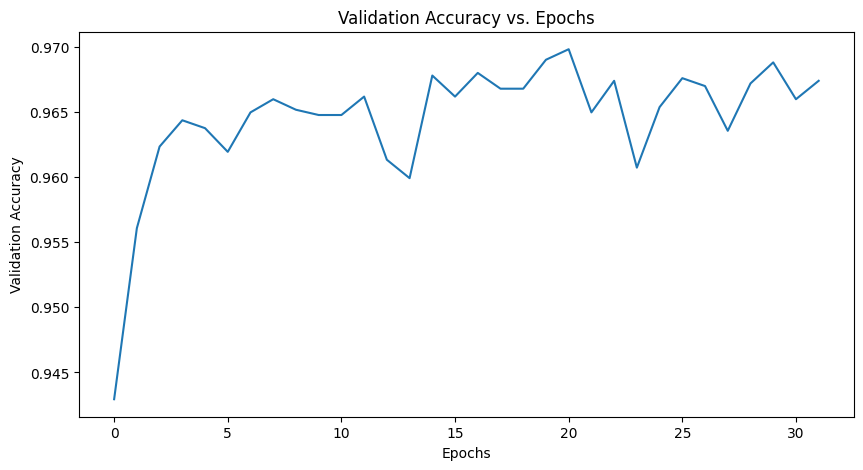

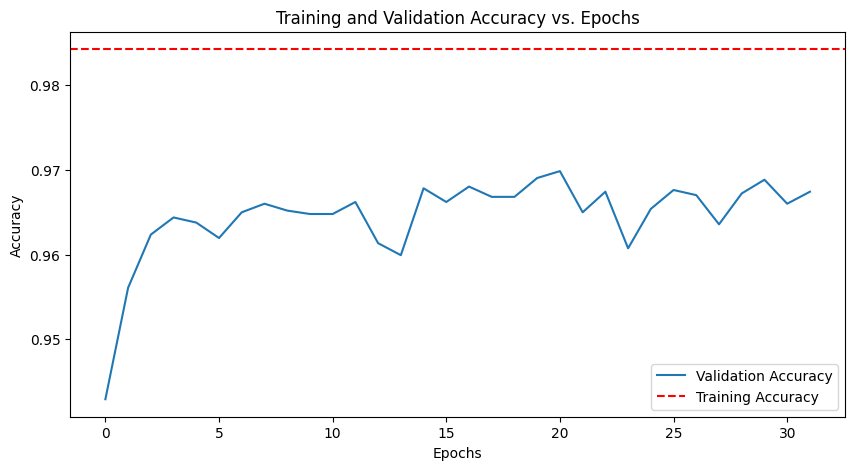

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Predictions on training and validation sets
y_train_pred = mlp.predict(X_train)
y_val_pred = mlp.predict(X_val)
y_test_pred = mlp.predict(X_test)

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)


print("Confusion Matrix - Training Set:")
print(conf_matrix_train)
print("\nConfusion Matrix - Validation Set:")
print(conf_matrix_val)
print("\nConfusion Matrix - Test Set:")
print(conf_matrix_test)

# Classification Report
class_report_train = classification_report(y_train, y_train_pred)
class_report_val = classification_report(y_val, y_val_pred)
class_report_test = classification_report(y_test, y_test_pred)

print("\nClassification Report - Training Set:")
print(class_report_train)
print("\nClassification Report - Validation Set:")
print(class_report_val)
print("\nClassification Report - Test Set:")
print(class_report_test)

# Training Accuracy and Validation Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\nTraining Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

# Plot Validation Accuracy vs Epochs
plt.figure(figsize=(10, 5))
plt.plot(mlp.validation_scores_)
plt.title('Validation Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

# Plot Training Accuracy and Validation Accuracy vs Epochs
plt.figure(figsize=(10, 5))
plt.plot(mlp.validation_scores_, label='Validation Accuracy')
plt.axhline(train_accuracy, color='red', linestyle='--', label='Training Accuracy')
plt.title('Training and Validation Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()